In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

Text(0, 0.5, 'MtCO2/year')

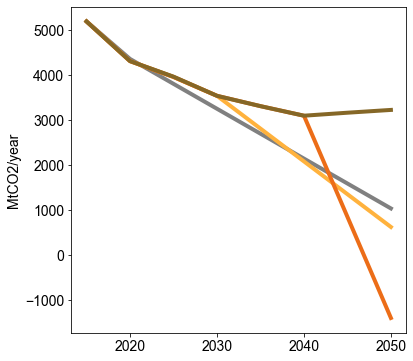

In [ ]:
#trajectory
df=pd.read_excel("CO2_accounting_0826.xlsx",sheet_name='total')
df = df[df['Year'].isin([2015, 2020,2025,2030,2035,2040,2045,2050])]
time=df['Year']
ES=df['stick']
E2030=df['2030nl']
E2040=df['2040nl']
E2050 = df['2050nl']


Text(0, 0.5, 'GtCO2')

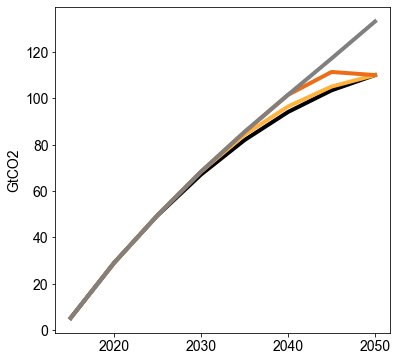

In [ ]:
#cumulative

#calculating
ES_c=[]
Total=0
for i in range(len(df['Year'])):

    year = df['Year'].iloc[i]
    emission =df ['stick'].iloc[i]
    if year == 2015:
        ES_c.append(emission)
        Total = Total + emission
    else:
        total=1/2*5*(emission+df['stick'].iloc[i-1])
        Total = Total + total
        ES_c.append(Total)

E2030_c=[]
Total = 0
for i in range(len(df['Year'])):
    year = df['Year'].iloc[i]
    emission =df ['2030nl'].iloc[i]
    if year == 2015:
        E2030_c.append(emission)
        Total = Total + emission
    else:
        total=1/2*5*(emission+df['2030nl'].iloc[i-1])
        Total = Total + total
        E2030_c.append(Total)

E2040_c=[]
Total = 0
for i in range(len(df['Year'])):
    year = df['Year'].iloc[i]
    emission =df ['2040nl'].iloc[i]
    if year == 2015:
        E2040_c.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+df ['2040nl'].iloc[i-1])
        Total = Total + total
        E2040_c.append(Total)
E2050_c=[]
Total = 0
for i in range(len(df['Year'])):
    year = df['Year'].iloc[i]
    emission =E2050[i]
    if year == 2015:
        E2050_c.append(emission)
        Total = Total + emission
    else:
        total=0.5*5*(emission+E2050[i-1])
        Total = Total + total
        E2050_c.append(Total)

ES_c= [x / 1000 for x in ES_c]
E2030_c=[x / 1000 for x in E2030_c]
E2040_c=[x / 1000 for x in E2040_c]
E2050_c=[x / 1000 for x in E2050_c]



stick-80 163.44665999999995
2030nl-80 180.61272
2030l-80 100.68407999999998
2040nl-80 230.73335999999998


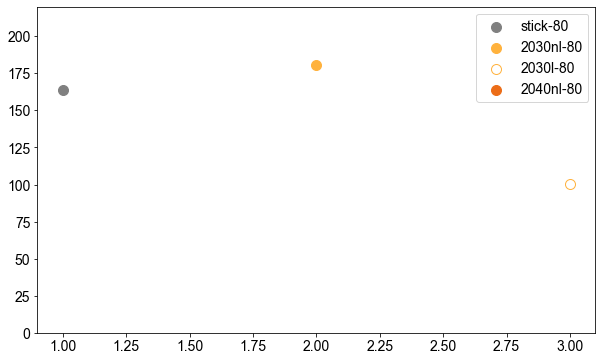

In [ ]:
# carbon price
# 读取Excel文件并设置Scenario列为索引
CP = pd.read_excel("Carbon pricing_Paper_0821.xlsx", sheet_name="Sheet1", index_col='Scenario')

CPscenarios = ['stick-80', '2030nl-80', '2030l-80', '2040nl-80']
xaxis = [1,2,3,3]
CP_plot = []
for scenario in CPscenarios:
    if scenario in CP.index:
        price_value = CP.loc[scenario, 'Price0822-unitConv']
        print(scenario, price_value)
        CP_plot.append(price_value)  
    else:
        print(f"Scenario {scenario} not found in the index")
# print(CP_plot)  


markers = ['o', 'o', 'o', 'o']  
colors = ['grey', '#FFB23D', '#FFB23D', '#EC6D18']
fillstyles = ['grey', '#FFB23D', 'white', '#EC6D18']  



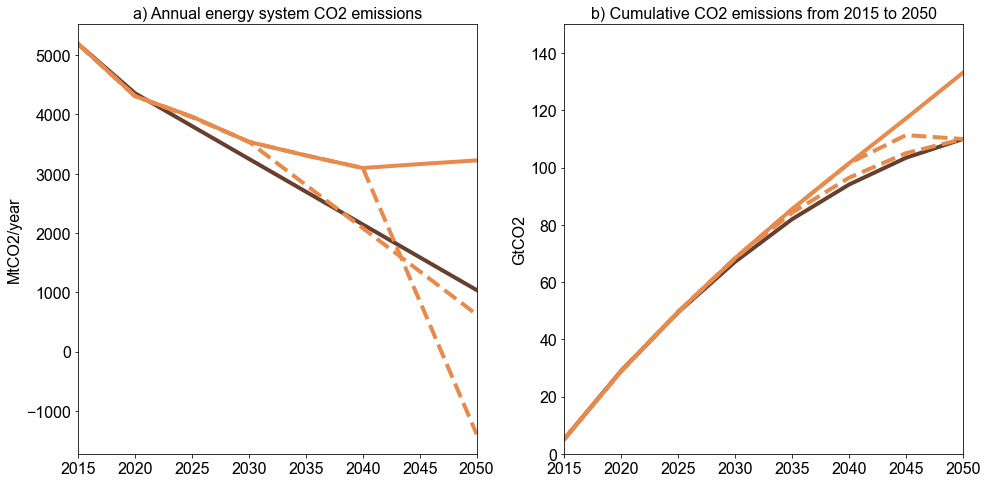

In [ ]:
#plotting code

fig = plt.figure(figsize=(14, 7))

matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 16


gs = fig.add_gridspec(1,3)
gs = fig.add_gridspec(1,2)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
# ax3 = fig.add_subplot(gs[2])

ax1.plot(time,ES, color='#673F2F', linewidth=4)
ax1.plot(time,E2030, color= '#E88A4C', linewidth=4,linestyle = "--")
ax1.plot(time,E2040 , color = '#E88A4C', linewidth=4,linestyle = "--")
ax1.plot(time,E2050 , color = '#E88A4C', linewidth=4, linestyle = "-")
ax1.set_ylabel("MtCO2/year")
ax1.set_xlim(2015, 2050)

# ax2.plot(time,ES_c, color='gray', linewidth=4)
ax2.plot(time,ES_c, color='#673F2F', linewidth=4)
ax2.plot(time,E2030_c, color= '#E88A4C', linewidth=4, linestyle = "--")
ax2.plot(time,E2040_c, color = '#E88A4C', linewidth=4, linestyle = "--")
ax2.plot(time,E2050_c, color='#E88A4C', linewidth=4, linestyle = "-")
ax2.set_ylabel("GtCO2")
ax2.set_xlim(2015, 2050)
ax2.set_ylim(0, 150)


ax1.set_title("a) Annual energy system CO2 emissions",  fontsize = 16)
ax2.set_title("b) Cumulative CO2 emissions from 2015 to 2050", fontsize = 16)

plt.tight_layout()

plt.show()

In [7]:
CP

,Price0822,Price0226,Price0822-unitConv
Scenario,,,
stick-100,352.823,194.22342,190.52442
stick-80,302.679,162.23112,163.44666
stick-60,236.416,113.10246,127.66464
2030nl-100,396.729,205.20972,214.23366
2030nl-80,334.468,168.46056,180.61272
2030nl-60,227.061,104.41278,122.61294
2030l-100,230.102,115.70850,124.25508
2030l-80,186.452,92.64294,100.68408
2030l-60,125.543,54.40122,67.79322


stick-80 163.44665999999995
2030nl-80 180.61272
2030l-80 100.68407999999998
2040nl-80 230.73335999999998
2040l-80 157.45589999999996


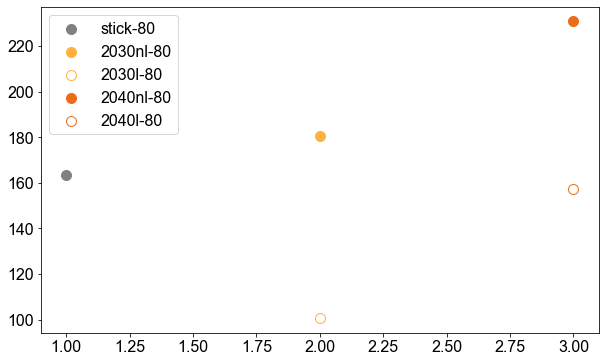

In [ ]:
# carbon price

CP = pd.read_excel("Carbon pricing_Paper_0821.xlsx", sheet_name="Sheet1", index_col='Scenario')

CPscenarios = ['stick-80', '2030nl-80', '2030l-80', '2040nl-80', '2040l-80']
xaxis = [1,2,2,3,3]
CP_plot = []
for scenario in CPscenarios:
    if scenario in CP.index:
        price_value = CP.loc[scenario, 'Price0822-unitConv']
        print(scenario, price_value)
        CP_plot.append(price_value)  
    else:
        print(f"Scenario {scenario} not found in the index")
# print(CP_plot)  



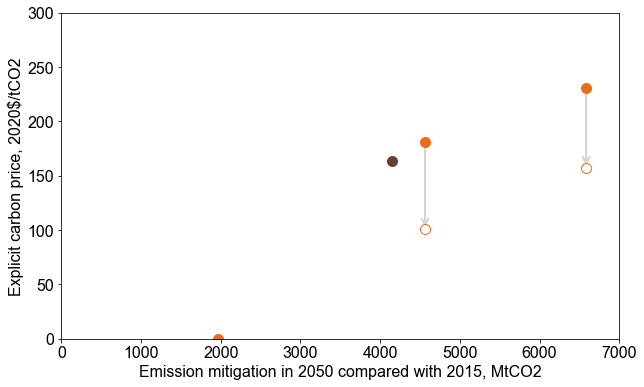

In [ ]:
# something like MAC curve:
aa= - ES.iloc[-1] + ES.iloc[0]
bb= - E2030.iloc[-1] + E2030.iloc[0]
cc= - E2040.iloc[-1] + E2040.iloc[0]
xaxis2=[aa, bb, bb, cc, cc]


CPscenarios = ['stick-80p', '2030nl-80p', '2030l-80p', '2040nl-80p', '2040l-80p']


plt.figure(figsize=(10, 6))
markers = ['o', 'o', 'o', 'o',"o"]  
colors = ['#673F2F', '#EC6D18', '#EC6D18', '#EC6D18',  '#EC6D18']
fillstyles = ['#673F2F', '#EC6D18', 'white', '#EC6D18', "white"]  

custom_labels = ['Immediate Stick', 'Quick Stick', 'Quick Stick (Accelerated Innovation)',
                     'Late Stick', 'Late Stick (Accelerated Innovation)']  
for i, (x, y) in enumerate(zip(xaxis2, CP_plot)):
    if y is not None:
        plt.scatter(x, y, color=colors[i], marker=markers[i], facecolors=fillstyles[i], edgecolors=colors[i],
                    s=100, label=custom_labels[i], zorder = 2)

plt.annotate('', xy=(xaxis2[2], CP_plot[2]), xytext=(xaxis2[1], CP_plot[1]),
             arrowprops=dict(arrowstyle='->', color='lightgrey', lw=2), zorder=1)

plt.annotate('', xy=(xaxis2[4], CP_plot[4]), xytext=(xaxis2[3], CP_plot[3]),
             arrowprops=dict(arrowstyle='->', color='lightgrey', lw=2), zorder=1)

plt.scatter([1963.86], [0], color="#EC6D18", s=100, zorder = 1, label = "Carrot-only")


plt.xticks()
plt.ylim(0, 300)
plt.xlim(0, 7000)
plt.xlabel("Emission mitigation in 2050 compared with 2015, MtCO2")
plt.ylabel("Explicit carbon price, 2020$/tCO2")

# plt.savefig("Figure3_20241007.svg")
plt.show()
